In [1]:
#Import the necessary Python Packages. 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as plt 
import sklearn

# Set ipython's max row display
pd.set_option('display.max_row', 10000)

#Setting to print all the values in array
np.set_printoptions(threshold=np.nan)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 500)

In [2]:
traindata = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')

In [3]:
#traindata.info()

In [4]:
total = traindata.isnull().sum().sort_values(ascending=False)
percent = (traindata.isnull().sum()/traindata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [5]:
#Get ridding of the columns with lot of missing data
traindata = traindata.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
testdata = testdata.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [6]:
#First Deal with the numerical variables then move to the categorical string variables.
#Create Data set with numerical variables
num_trainData = traindata.select_dtypes(include = ['int64', 'float64'])
numcol = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [7]:
#Find out correlation with numerical features
traindata_corr = num_trainData.corr()['SalePrice'][:-1]
golden_feature_list = traindata_corr[abs(traindata_corr) > 0].sort_values(ascending = False)
print("Below are {} correlated values with SalePrice:\n{}".format(len(golden_feature_list), golden_feature_list))

Below are 37 correlated values with SalePrice:
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -

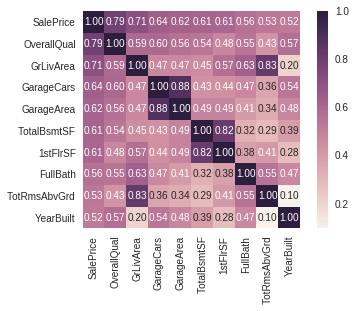

In [8]:
#Create heatmap for correlated numerical variables
%matplotlib inline
traindata_corrheatmap = num_trainData.corr()
cols = traindata_corrheatmap.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(num_trainData[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [9]:
#Delete the outliers
traindata = traindata.drop(traindata[traindata['Id'] == 1299].index)
traindata = traindata.drop(traindata[traindata['Id'] == 524].index)

In [10]:
#On basis of EDA we did earlier, filter out the variable we want to use for predicting the sale price
finaldata = traindata.filter(['OverallQual','MSSubClass', 'KitchenAbvGr','OverallCond', 'GrLivArea', 'EnclosedPorch', 'GarageArea','TotalBsmtSF',  'YearBuilt', 'SalePrice'], axis = 1)
finaltest = testdata.filter(['OverallQual','MSSubClass', 'KitchenAbvGr', 'OverallCond','GrLivArea', 'EnclosedPorch', 'GarageArea','TotalBsmtSF',  'YearBuilt'], axis = 1)

In [11]:
#Handle mising values in test data 
finaltest.loc[finaltest.GarageArea.isnull(), 'GarageArea'] = 0
finaltest.loc[finaltest.TotalBsmtSF.isnull(), 'TotalBsmtSF'] = 0

In [12]:
#Transform Sale Price and GrLivArea to reduce standardize the data 
finaldata['SalePrice'] = np.log(finaldata['SalePrice'])
finaldata['GrLivArea'] = np.log(finaldata['GrLivArea'])
finaltest['GrLivArea'] = np.log(finaltest['GrLivArea'])

In [13]:
#Find out the columns which are missing in final data 
total = finaldata.isnull().sum().sort_values(ascending=False)
percent = (finaldata.isnull().sum()/finaldata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [14]:
#Splt into predictor and variable
xtrain = finaldata.iloc[:, :-1].values
ytrain = finaldata.iloc[:,9].values
xtest = finaltest.iloc[:, :9].values
print(xtrain)


[[  7.00000000e+00   6.00000000e+01   1.00000000e+00   5.00000000e+00
    7.44424865e+00   0.00000000e+00   5.48000000e+02   8.56000000e+02
    2.00300000e+03]
 [  6.00000000e+00   2.00000000e+01   1.00000000e+00   8.00000000e+00
    7.14045304e+00   0.00000000e+00   4.60000000e+02   1.26200000e+03
    1.97600000e+03]
 [  7.00000000e+00   6.00000000e+01   1.00000000e+00   5.00000000e+00
    7.48773376e+00   0.00000000e+00   6.08000000e+02   9.20000000e+02
    2.00100000e+03]
 [  7.00000000e+00   7.00000000e+01   1.00000000e+00   5.00000000e+00
    7.44833386e+00   2.72000000e+02   6.42000000e+02   7.56000000e+02
    1.91500000e+03]
 [  8.00000000e+00   6.00000000e+01   1.00000000e+00   5.00000000e+00
    7.69530313e+00   0.00000000e+00   8.36000000e+02   1.14500000e+03
    2.00000000e+03]
 [  5.00000000e+00   5.00000000e+01   1.00000000e+00   5.00000000e+00
    7.21670949e+00   0.00000000e+00   4.80000000e+02   7.96000000e+02
    1.99300000e+03]
 [  8.00000000e+00   2.00000000e+01   1.

In [15]:
print(ytrain)
#Prediction Model
import xgboost as xgb
regr = xgb.XGBRegressor()
regr.fit(xtrain, ytrain)

#Calculate the score for the XGBoost Model
regr.score(xtrain,ytrain)

# Run predictions using XGBoost
y_pred = regr.predict(xtrain)

#Predict the prices for Test Data Set
y_test = regr.predict(xtest)

[ 12.24769432  12.10901093  12.31716669  11.8493977   12.4292162
  11.87059991  12.63460303  12.20607265  11.7745202   11.6784399
  11.77143616  12.7512997   11.87756858  12.54075757  11.96400108
  11.7905572   11.91170158  11.40756495  11.97665948  11.84222921
  12.69250311  11.84510278  12.34583459  11.7745202   11.94470788
  12.45410391  11.81154748  12.63134038  12.24288662  11.13458902
  10.59663473  11.91404782  12.10015642  12.01672647  12.53357621
  12.64109656  11.88448902  11.9381932   11.59910316  11.31447453
  11.98292909  12.04355372  11.87756858  11.77721096  11.85651517
  12.67576373  12.38708501  12.42801548  11.6351431   11.75194237
  12.08390501  11.6483301   11.60823564  12.86099861  11.77528973
  12.10348606  12.05815252  12.18841771  12.99175343  11.7352687
  11.97035031  11.5228758   12.21849517  11.8493977   12.29910751
  12.66665705  12.10071213  12.32829028  11.28978191  12.32385568
  12.4049235   11.77143616  12.1281111   11.88379913  11.58431546
  11.41861479

/home/balda/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
##Fit Linear Regression Model 
#from sklearn.linear_model import LinearRegression 

from sklearn import linear_model
regressor = linear_model.Lasso(alpha=5e-4, max_iter=50000)
#regressor = LinearRegression()
#lasso regression

regressor.fit(xtrain, ytrain)

#Calculate score for the Linear Regression model
regressor.score(xtrain,ytrain)

#Predict Value of the house using Linear Regression
ytrainpred = regressor.predict(xtrain)

#Predict Value of the house on test data set 
ytestpred = regressor.predict(xtest)

In [17]:
#Average out the predicted value from XGBoost and Lasso Regression
print(y_test)
print(ytestpred)
finalpred = (y_test+ytestpred)/2
finalpred = np.exp(finalpred)
#finalpred = np.exp(ytestpred)
print(finalpred)

[ 11.79882812  11.95913506  12.04584312  12.11950874  12.21922493
  12.09665871  12.03803539  12.03737545  12.11959076  11.65237999
  12.15256214  11.48417282  11.4776907   11.93898678  11.9063406
  12.93833733  12.5090065   12.65070152  12.56816292  13.05441856
  12.71354103  12.25702286  12.05289745  12.09306622  11.95207214
  12.20761395  12.81168556  12.48376274  12.22309494  12.13415623
  12.19599056  11.56347942  12.09561729  12.62523174  12.59185791
  12.26973438  12.1396389   11.91368675  11.91368675  11.84356689
  12.01199913  11.8374052   12.5169487   12.378685    12.28546906
  12.26174164  12.3688736   12.1798296   12.03335953  11.87545681
  11.87545681  12.06982613  11.92689228  11.90775394  12.26079178
  11.95050049  11.91296101  11.88995171  12.25432682  11.78648472
  11.8227396   12.0539732   11.67347908  11.78795815  11.7410326
  11.71241379  11.54223919  11.82748604  11.89691734  12.02560425
  11.63452339  11.50597     12.00157738  11.82494164  11.95458603
  11.6606454

In [20]:
#Output to csv
pred_df = pd.DataFrame(finalpred, index=testdata["Id"], columns=["SalePrice"])
pred_df.to_csv('output1.csv', header=True, index_label='Id')